# 6.3 Geographic Visualization

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".geojson" file for countires. 

country_geo = r'C:\Users\djval\Google Drive\Career\Career Foundry\Data Immerson\Achievement 6\01-2022 COVID 19 Impact on Trade Analysis\03 Scripts\countries.geojson'

In [5]:
# Define path

path = r'C:\Users\djval\Google Drive\Career\Career Foundry\Data Immerson\Achievement 6\01-2022 COVID 19 Impact on Trade Analysis'

In [6]:
# Import the US import and export data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'continents and countries - 2019 - 2021.csv'))

In [7]:
df.head()

,year,continent,country,IYR,EYR,Trade_deficit,Average of US_ unemployment_rate,Average of US_housing_price_index,Sum of number_of_covid_cases_US,Sum of number_of_covid_deaths
0,2019,Africa,Algeria,2479.529457,1000.467959,1479.061498,3.68,274.48,0,0
1,2021,Africa,Algeria,1648.870835,689.426145,959.444690,5.36,345.18,206532402,2679372
2,2020,Africa,Algeria,482.142284,725.192594,-243.050310,8.09,296.17,120458016,2154714
3,2021,Africa,Angola,1055.011525,398.724445,656.287080,5.36,345.18,206532402,2679372
4,2019,Africa,Angola,954.541199,534.698174,419.843025,3.68,274.48,0,0


In [8]:
df.shape

(510, 10)

### 2. Data wrangling 

In [9]:
df.columns

Index(['year', 'continent', 'country', 'IYR', 'EYR', 'Trade_deficit',
       'Average of US_ unemployment_rate', 'Average of US_housing_price_index',
       'Sum of number_of_covid_cases_US', 'Sum of number_of_covid_deaths'],
      dtype='object')

### 3. Conduct consistency checks

In [10]:
# Check for missing values

df.isnull().sum()

year                                 0
continent                            0
country                              0
IYR                                  0
EYR                                  0
Trade_deficit                        0
Average of US_ unemployment_rate     0
Average of US_housing_price_index    0
Sum of number_of_covid_cases_US      0
Sum of number_of_covid_deaths        0
dtype: int64

##### Duplicates check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # no dups

(510,)

##### Extreme values checks

<AxesSubplot:xlabel='IYR', ylabel='Count'>

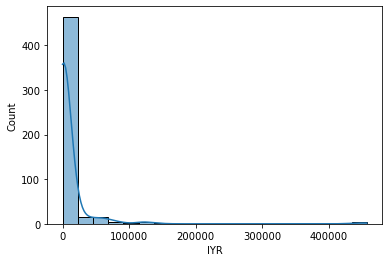

In [15]:
sns.histplot(df['IYR'], bins=20, kde = True) # shows extreme values for 'IYR' imports year totals

In [32]:
# Check how many extreme values

df[df['IYR'] >50000]

,year,continent,country,IYR,EYR,Trade_deficit,Average of US_ unemployment_rate,Average of US_housing_price_index,Sum of number_of_covid_cases_US,Sum of number_of_covid_deaths
150,2019,Asia,China,450760.37500,106448.371700,344312.00330,3.68,274.48,0,0
151,2021,Asia,China,456832.16880,137680.507800,319151.66100,5.36,345.18,206532402,2679372
152,2020,Asia,China,434748.95670,124485.430700,310263.52600,8.09,296.17,120458016,2154714
153,2019,Asia,Japan,143585.52310,74497.004250,69088.51885,3.68,274.48,0,0
154,2021,Asia,Japan,123578.03410,68416.446660,55161.58744,5.36,345.18,206532402,2679372
155,2020,Asia,Japan,119499.26340,63756.411580,55742.85182,8.09,296.17,120458016,2154714
156,2021,Asia,Vietnam,92324.95191,9959.983881,82364.96803,5.36,345.18,206532402,2679372
157,2021,Asia,"Korea, South",86233.83486,60346.090300,25887.74456,5.36,345.18,206532402,2679372
158,2020,Asia,Vietnam,79618.64793,9912.050151,69706.59778,8.09,296.17,120458016,2154714
159,2019,Asia,"Korea, South",77478.59070,56504.090990,20974.49971,3.68,274.48,0,0


In [33]:
# Clean extreme values for IYR

df_2 = df[df['IYR'] < 50000]

In [34]:
df.dtypes

year                                   int64
continent                             object
country                               object
IYR                                  float64
EYR                                  float64
Trade_deficit                        float64
Average of US_ unemployment_rate     float64
Average of US_housing_price_index    float64
Sum of number_of_covid_cases_US        int64
Sum of number_of_covid_deaths          int64
dtype: object

In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and geojson geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['CTYNAME','IYR'],
    key_on = 'feature.properties.admin', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "IYR").add_to(map)
folium.LayerControl().add_to(map)

map

### 4. Plotting a choropleth

In [35]:
# Create a data frame with just the countires and the imports values we want plotted

data_to_plot = df_2[['country','IYR']]
data_to_plot.head()

,country,IYR
0,Algeria,2479.529457
1,Algeria,1648.870835
2,Algeria,482.142284
3,Angola,1055.011525
4,Angola,954.541199


In [37]:
map.save('plot_data.html')

# Project question: How did the COVID 19 Pandemic impact US trade?

# Hypothesis: If there is global pandemic, the US will increase its % of imports and exports with countries in North America, Central America and South America and decrease its % of intercontinental imports and exports.